In [2]:
import pandas as pd
import numpy as np
import datetime as dt
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
import statistics
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split

In [3]:
#importing data and priting
rawdata = pd.read_csv('dataset.csv')
rawdata

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200799367,MCL us,2019-11-21 00:00:00,2019.0,1.930053e+09,2019-10-26,20191025,20191026,20191110.0,USD,RV,1.0,NaN,9613.56,20191026.0,NAA8,1.930053e+09,0
1,U001,0200029010,KROG,NaN,2020.0,1.930583e+09,2020-02-28,20200229,20200228,20200314.0,USD,RV,1.0,NaN,10318.00,20200228.0,NAA8,1.930583e+09,1
2,U001,0200418007,AM corporation,NaN,2020.0,1.930846e+09,2020-05-04,20200502,20200504,20200519.0,USD,RV,1.0,NaN,15452.12,20200504.0,NAA8,1.930846e+09,1
3,U001,200148860,DOLLA llc,2019-07-12 00:00:00,2019.0,1.929548e+09,2019-06-27,20190626,20190627,20190712.0,USD,RV,1.0,NaN,69953.48,20190627.0,NAA8,1.929548e+09,0
4,CA02,0140104409,LOB corporation,NaN,2020.0,2.960622e+09,2020-03-23,20200324,20200323,20200403.0,CAD,RV,1.0,NaN,25182.72,20200324.0,CA10,2.960622e+09,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,0200782001,GORDO co,2019-11-19 00:00:00,2019.0,1.930066e+09,2019-10-29,20191029,20191029,20191113.0,USD,RV,1.0,NaN,55942.88,20191029.0,NAA8,1.930066e+09,0
49996,U001,0200769623,WAL-MAR,NaN,2020.0,1.930716e+09,2020-03-30,20200329,20200330,20200414.0,USD,RV,1.0,NaN,57735.71,20200330.0,NAH4,1.930716e+09,1
49997,U001,0200936373,SUPE corp,2019-12-24 00:00:00,2019.0,1.930247e+09,2019-12-07,20191207,20191207,20191222.0,USD,RV,1.0,NaN,176363.36,20191207.0,NAA8,1.930247e+09,0
49998,U001,0200769623,WAL-MAR co,NaN,2020.0,1.930730e+09,2020-04-01,20200401,20200401,20200416.0,USD,RV,1.0,NaN,31472.70,20200401.0,NAH4,1.930730e+09,1


In [4]:
rawdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   business_code           50000 non-null  object 
 1   cust_number             50000 non-null  object 
 2   name_customer           50000 non-null  object 
 3   clear_date              40000 non-null  object 
 4   buisness_year           50000 non-null  float64
 5   doc_id                  50000 non-null  float64
 6   posting_date            50000 non-null  object 
 7   document_create_date    50000 non-null  int64  
 8   document_create_date.1  50000 non-null  int64  
 9   due_in_date             50000 non-null  float64
 10  invoice_currency        50000 non-null  object 
 11  document type           50000 non-null  object 
 12  posting_id              50000 non-null  float64
 13  area_business           0 non-null      float64
 14  total_open_amount       50000 non-null

# Data Preprocessing

In [5]:
#area_business column is completely empty thus droppping it
data = rawdata.drop(columns=['area_business'])

In [6]:
dupdata = data[data.duplicated(subset=['document_create_date','document_create_date.1'], keep=False)]
dupdata

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200799367,MCL us,2019-11-21 00:00:00,2019.0,1.930053e+09,2019-10-26,20191025,20191026,20191110.0,USD,RV,1.0,9613.56,20191026.0,NAA8,1.930053e+09,0
1,U001,0200029010,KROG,NaN,2020.0,1.930583e+09,2020-02-28,20200229,20200228,20200314.0,USD,RV,1.0,10318.00,20200228.0,NAA8,1.930583e+09,1
2,U001,0200418007,AM corporation,NaN,2020.0,1.930846e+09,2020-05-04,20200502,20200504,20200519.0,USD,RV,1.0,15452.12,20200504.0,NAA8,1.930846e+09,1
3,U001,200148860,DOLLA llc,2019-07-12 00:00:00,2019.0,1.929548e+09,2019-06-27,20190626,20190627,20190712.0,USD,RV,1.0,69953.48,20190627.0,NAA8,1.929548e+09,0
4,CA02,0140104409,LOB corporation,NaN,2020.0,2.960622e+09,2020-03-23,20200324,20200323,20200403.0,CAD,RV,1.0,25182.72,20200324.0,CA10,2.960622e+09,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,0200782001,GORDO co,2019-11-19 00:00:00,2019.0,1.930066e+09,2019-10-29,20191029,20191029,20191113.0,USD,RV,1.0,55942.88,20191029.0,NAA8,1.930066e+09,0
49996,U001,0200769623,WAL-MAR,NaN,2020.0,1.930716e+09,2020-03-30,20200329,20200330,20200414.0,USD,RV,1.0,57735.71,20200330.0,NAH4,1.930716e+09,1
49997,U001,0200936373,SUPE corp,2019-12-24 00:00:00,2019.0,1.930247e+09,2019-12-07,20191207,20191207,20191222.0,USD,RV,1.0,176363.36,20191207.0,NAA8,1.930247e+09,0
49998,U001,0200769623,WAL-MAR co,NaN,2020.0,1.930730e+09,2020-04-01,20200401,20200401,20200416.0,USD,RV,1.0,31472.70,20200401.0,NAH4,1.930730e+09,1


In [7]:
len(dupdata)

49104

In [8]:
#The two columns document_create_date and document_create_date.1 are mostly same thus dropping one
data.drop(columns=['document_create_date.1'],inplace = True)
data

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200799367,MCL us,2019-11-21 00:00:00,2019.0,1.930053e+09,2019-10-26,20191025,20191110.0,USD,RV,1.0,9613.56,20191026.0,NAA8,1.930053e+09,0
1,U001,0200029010,KROG,NaN,2020.0,1.930583e+09,2020-02-28,20200229,20200314.0,USD,RV,1.0,10318.00,20200228.0,NAA8,1.930583e+09,1
2,U001,0200418007,AM corporation,NaN,2020.0,1.930846e+09,2020-05-04,20200502,20200519.0,USD,RV,1.0,15452.12,20200504.0,NAA8,1.930846e+09,1
3,U001,200148860,DOLLA llc,2019-07-12 00:00:00,2019.0,1.929548e+09,2019-06-27,20190626,20190712.0,USD,RV,1.0,69953.48,20190627.0,NAA8,1.929548e+09,0
4,CA02,0140104409,LOB corporation,NaN,2020.0,2.960622e+09,2020-03-23,20200324,20200403.0,CAD,RV,1.0,25182.72,20200324.0,CA10,2.960622e+09,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,0200782001,GORDO co,2019-11-19 00:00:00,2019.0,1.930066e+09,2019-10-29,20191029,20191113.0,USD,RV,1.0,55942.88,20191029.0,NAA8,1.930066e+09,0
49996,U001,0200769623,WAL-MAR,NaN,2020.0,1.930716e+09,2020-03-30,20200329,20200414.0,USD,RV,1.0,57735.71,20200330.0,NAH4,1.930716e+09,1
49997,U001,0200936373,SUPE corp,2019-12-24 00:00:00,2019.0,1.930247e+09,2019-12-07,20191207,20191222.0,USD,RV,1.0,176363.36,20191207.0,NAA8,1.930247e+09,0
49998,U001,0200769623,WAL-MAR co,NaN,2020.0,1.930730e+09,2020-04-01,20200401,20200416.0,USD,RV,1.0,31472.70,20200401.0,NAH4,1.930730e+09,1


# Date Format

In [9]:
#The format of the date in the clear_date format is not in default format so changing it
data['clear_date'] = pd.to_datetime(data['clear_date'])
data

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200799367,MCL us,2019-11-21,2019.0,1.930053e+09,2019-10-26,20191025,20191110.0,USD,RV,1.0,9613.56,20191026.0,NAA8,1.930053e+09,0
1,U001,0200029010,KROG,NaT,2020.0,1.930583e+09,2020-02-28,20200229,20200314.0,USD,RV,1.0,10318.00,20200228.0,NAA8,1.930583e+09,1
2,U001,0200418007,AM corporation,NaT,2020.0,1.930846e+09,2020-05-04,20200502,20200519.0,USD,RV,1.0,15452.12,20200504.0,NAA8,1.930846e+09,1
3,U001,200148860,DOLLA llc,2019-07-12,2019.0,1.929548e+09,2019-06-27,20190626,20190712.0,USD,RV,1.0,69953.48,20190627.0,NAA8,1.929548e+09,0
4,CA02,0140104409,LOB corporation,NaT,2020.0,2.960622e+09,2020-03-23,20200324,20200403.0,CAD,RV,1.0,25182.72,20200324.0,CA10,2.960622e+09,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,0200782001,GORDO co,2019-11-19,2019.0,1.930066e+09,2019-10-29,20191029,20191113.0,USD,RV,1.0,55942.88,20191029.0,NAA8,1.930066e+09,0
49996,U001,0200769623,WAL-MAR,NaT,2020.0,1.930716e+09,2020-03-30,20200329,20200414.0,USD,RV,1.0,57735.71,20200330.0,NAH4,1.930716e+09,1
49997,U001,0200936373,SUPE corp,2019-12-24,2019.0,1.930247e+09,2019-12-07,20191207,20191222.0,USD,RV,1.0,176363.36,20191207.0,NAA8,1.930247e+09,0
49998,U001,0200769623,WAL-MAR co,NaT,2020.0,1.930730e+09,2020-04-01,20200401,20200416.0,USD,RV,1.0,31472.70,20200401.0,NAH4,1.930730e+09,1


In [10]:
#The document_create_date, due_in_date, baseline_create_date have date stored in int and float datatypes thus converting them to proper date format
data[['due_in_date','baseline_create_date','document_create_date']] = data[['due_in_date','baseline_create_date','document_create_date']].apply(pd.to_datetime, format='%Y%m%d')

In [11]:
data

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200799367,MCL us,2019-11-21,2019.0,1.930053e+09,2019-10-26,2019-10-25,2019-11-10,USD,RV,1.0,9613.56,2019-10-26,NAA8,1.930053e+09,0
1,U001,0200029010,KROG,NaT,2020.0,1.930583e+09,2020-02-28,2020-02-29,2020-03-14,USD,RV,1.0,10318.00,2020-02-28,NAA8,1.930583e+09,1
2,U001,0200418007,AM corporation,NaT,2020.0,1.930846e+09,2020-05-04,2020-05-02,2020-05-19,USD,RV,1.0,15452.12,2020-05-04,NAA8,1.930846e+09,1
3,U001,200148860,DOLLA llc,2019-07-12,2019.0,1.929548e+09,2019-06-27,2019-06-26,2019-07-12,USD,RV,1.0,69953.48,2019-06-27,NAA8,1.929548e+09,0
4,CA02,0140104409,LOB corporation,NaT,2020.0,2.960622e+09,2020-03-23,2020-03-24,2020-04-03,CAD,RV,1.0,25182.72,2020-03-24,CA10,2.960622e+09,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,0200782001,GORDO co,2019-11-19,2019.0,1.930066e+09,2019-10-29,2019-10-29,2019-11-13,USD,RV,1.0,55942.88,2019-10-29,NAA8,1.930066e+09,0
49996,U001,0200769623,WAL-MAR,NaT,2020.0,1.930716e+09,2020-03-30,2020-03-29,2020-04-14,USD,RV,1.0,57735.71,2020-03-30,NAH4,1.930716e+09,1
49997,U001,0200936373,SUPE corp,2019-12-24,2019.0,1.930247e+09,2019-12-07,2019-12-07,2019-12-22,USD,RV,1.0,176363.36,2019-12-07,NAA8,1.930247e+09,0
49998,U001,0200769623,WAL-MAR co,NaT,2020.0,1.930730e+09,2020-04-01,2020-04-01,2020-04-16,USD,RV,1.0,31472.70,2020-04-01,NAH4,1.930730e+09,1


# Removing the datapoints where the target(clear_date) value is null

In [12]:
#The cells for which isOpen is 1 will be used as testdata
Main_test = data[data['isOpen'] == 1]
Main_test

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
1,U001,0200029010,KROG,NaT,2020.0,1.930583e+09,2020-02-28,2020-02-29,2020-03-14,USD,RV,1.0,10318.00,2020-02-28,NAA8,1.930583e+09,1
2,U001,0200418007,AM corporation,NaT,2020.0,1.930846e+09,2020-05-04,2020-05-02,2020-05-19,USD,RV,1.0,15452.12,2020-05-04,NAA8,1.930846e+09,1
4,CA02,0140104409,LOB corporation,NaT,2020.0,2.960622e+09,2020-03-23,2020-03-24,2020-04-03,CAD,RV,1.0,25182.72,2020-03-24,CA10,2.960622e+09,1
6,CA02,0140104249,SOB foundation,NaT,2020.0,2.960624e+09,2020-03-29,2020-03-29,2020-04-16,CAD,RV,1.0,36490.35,2020-04-06,CA10,2.960624e+09,1
8,U001,0200744019,TARG systems,NaT,2020.0,1.930827e+09,2020-04-27,2020-04-25,2020-05-12,USD,RV,1.0,1140.26,2020-04-27,NAA8,1.930827e+09,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49952,U001,0200769623,WAL-MAR associates,NaT,2020.0,1.930839e+09,2020-04-30,2020-04-29,2020-05-15,USD,RV,1.0,29363.02,2020-04-30,NAH4,1.930839e+09,1
49971,U001,0200744019,TARG in,NaT,2020.0,1.930825e+09,2020-04-25,2020-04-24,2020-05-10,USD,RV,1.0,15817.60,2020-04-25,NAA8,1.930825e+09,1
49984,U001,0200769623,WAL-MAR associates,NaT,2020.0,1.930838e+09,2020-04-29,2020-04-29,2020-05-14,USD,RV,1.0,9649.84,2020-04-29,NAH4,1.930838e+09,1
49996,U001,0200769623,WAL-MAR,NaT,2020.0,1.930716e+09,2020-03-30,2020-03-29,2020-04-14,USD,RV,1.0,57735.71,2020-03-30,NAH4,1.930716e+09,1


# Null Imputation 

In [13]:
#Total NA values in each columns 
data.isna().sum()

business_code               0
cust_number                 0
name_customer               0
clear_date              10000
buisness_year               0
doc_id                      0
posting_date                0
document_create_date        0
due_in_date                 0
invoice_currency            0
document type               0
posting_id                  0
total_open_amount           0
baseline_create_date        0
cust_payment_terms          0
invoice_id                  8
isOpen                      0
dtype: int64

In [14]:
#Empty Clear date and invoice id cells are of no use as they won't help in prediction thus removing them 
Main_train = data.dropna(axis = 0, how ='any')

In [15]:
Main_test.shape

(10000, 17)

In [16]:
Main_train.shape

(39992, 17)

# Target Column

In [17]:
#We have to predict delay  
Main_train['delay'] = (Main_train['clear_date'] - Main_train['due_in_date']).dt.days

In [18]:
#delay +ve is the delay, delay -ve is the early payment
Main_train

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,delay
0,U001,0200799367,MCL us,2019-11-21,2019.0,1.930053e+09,2019-10-26,2019-10-25,2019-11-10,USD,RV,1.0,9613.56,2019-10-26,NAA8,1.930053e+09,0,11
3,U001,200148860,DOLLA llc,2019-07-12,2019.0,1.929548e+09,2019-06-27,2019-06-26,2019-07-12,USD,RV,1.0,69953.48,2019-06-27,NAA8,1.929548e+09,0,0
5,U001,0200942148,BRADY corporation,2019-05-17,2019.0,1.928908e+09,2019-03-05,2019-03-05,2019-04-04,USD,RV,1.0,16372.80,2019-03-05,NAD5,1.928908e+09,0,43
7,U001,0200763814,SYSCO F us,2020-03-04,2020.0,1.930462e+09,2020-01-30,2020-01-31,2020-03-02,USD,RV,1.0,3710.05,2020-01-30,NA32,1.930462e+09,0,2
9,U001,0200769623,WAL-MAR co,2019-02-15,2019.0,1.928731e+09,2019-02-05,2019-02-04,2019-02-20,USD,RV,1.0,17565.77,2019-02-05,NAH4,1.928731e+09,0,-5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49993,U001,0200974851,RESTA,2019-09-04,2019.0,1.929753e+09,2019-08-15,2019-08-16,2019-08-30,USD,RV,1.0,149.52,2019-08-15,NAA8,1.929753e+09,0,5
49994,U001,0200769623,WAL-MAR corp,2020-01-13,2020.0,1.930342e+09,2020-01-02,2020-01-01,2020-01-17,USD,RV,1.0,78946.59,2020-01-02,NAH4,1.930342e+09,0,-4
49995,U001,0200782001,GORDO co,2019-11-19,2019.0,1.930066e+09,2019-10-29,2019-10-29,2019-11-13,USD,RV,1.0,55942.88,2019-10-29,NAA8,1.930066e+09,0,6
49997,U001,0200936373,SUPE corp,2019-12-24,2019.0,1.930247e+09,2019-12-07,2019-12-07,2019-12-22,USD,RV,1.0,176363.36,2019-12-07,NAA8,1.930247e+09,0,2


# Constant removal

In [19]:
Main_train

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,delay
0,U001,0200799367,MCL us,2019-11-21,2019.0,1.930053e+09,2019-10-26,2019-10-25,2019-11-10,USD,RV,1.0,9613.56,2019-10-26,NAA8,1.930053e+09,0,11
3,U001,200148860,DOLLA llc,2019-07-12,2019.0,1.929548e+09,2019-06-27,2019-06-26,2019-07-12,USD,RV,1.0,69953.48,2019-06-27,NAA8,1.929548e+09,0,0
5,U001,0200942148,BRADY corporation,2019-05-17,2019.0,1.928908e+09,2019-03-05,2019-03-05,2019-04-04,USD,RV,1.0,16372.80,2019-03-05,NAD5,1.928908e+09,0,43
7,U001,0200763814,SYSCO F us,2020-03-04,2020.0,1.930462e+09,2020-01-30,2020-01-31,2020-03-02,USD,RV,1.0,3710.05,2020-01-30,NA32,1.930462e+09,0,2
9,U001,0200769623,WAL-MAR co,2019-02-15,2019.0,1.928731e+09,2019-02-05,2019-02-04,2019-02-20,USD,RV,1.0,17565.77,2019-02-05,NAH4,1.928731e+09,0,-5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49993,U001,0200974851,RESTA,2019-09-04,2019.0,1.929753e+09,2019-08-15,2019-08-16,2019-08-30,USD,RV,1.0,149.52,2019-08-15,NAA8,1.929753e+09,0,5
49994,U001,0200769623,WAL-MAR corp,2020-01-13,2020.0,1.930342e+09,2020-01-02,2020-01-01,2020-01-17,USD,RV,1.0,78946.59,2020-01-02,NAH4,1.930342e+09,0,-4
49995,U001,0200782001,GORDO co,2019-11-19,2019.0,1.930066e+09,2019-10-29,2019-10-29,2019-11-13,USD,RV,1.0,55942.88,2019-10-29,NAA8,1.930066e+09,0,6
49997,U001,0200936373,SUPE corp,2019-12-24,2019.0,1.930247e+09,2019-12-07,2019-12-07,2019-12-22,USD,RV,1.0,176363.36,2019-12-07,NAA8,1.930247e+09,0,2


In [20]:
print(dict(Main_train['document type'].value_counts()))

{'RV': 39992}


In [21]:
#It can be seen that document type is a constant column thus dropping document_type column  
Main_train.drop(['document type'], axis = 1,inplace=True)

In [22]:
print(dict(Main_train['posting_id'].value_counts()))

{1.0: 39992}


In [23]:
#It can be seen that posting_id is a constant column thus dropping document_type column  
Main_train.drop(['posting_id'], axis = 1,inplace=True)

In [24]:
Main_train.shape

(39992, 16)

In [25]:
dup = Main_train.duplicated()
Main_train[dup]

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,delay
2433,U001,0200779051,AFFILI foundation,2019-11-21,2019.0,1.930146e+09,2019-11-12,2019-11-13,2019-11-27,USD,149937.97,2019-11-12,NAA8,1.930146e+09,0,-6
2514,U001,0200769623,WAL-MAR associates,2019-09-26,2019.0,1.929877e+09,2019-09-16,2019-09-15,2019-10-01,USD,6532.60,2019-09-16,NAH4,1.929877e+09,0,-5
2681,U001,0200789077,US,2019-05-17,2019.0,1.929236e+09,2019-04-30,2019-05-01,2019-05-15,USD,59409.67,2019-04-30,NAA8,1.929236e+09,0,2
2904,U001,0200769623,WAL-MAR associates,2019-12-23,2019.0,1.930263e+09,2019-12-11,2019-12-10,2019-12-26,USD,68987.25,2019-12-11,NAH4,1.930263e+09,0,-3
2910,U001,0200744019,TARG associates,2019-05-30,2019.0,1.929315e+09,2019-05-15,2019-05-14,2019-05-30,USD,42735.25,2019-05-15,NAA8,1.929315e+09,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49831,U001,0200769623,WAL-MAR,2019-02-12,2019.0,1.928690e+09,2019-01-27,2019-01-26,2019-02-11,USD,554.78,2019-01-27,NAH4,1.928690e+09,0,1
49843,U001,0200803720,DEC corp,2019-05-01,2019.0,1.929212e+09,2019-04-26,2019-04-26,2019-05-09,USD,285.84,2019-04-16,NAM4,1.929212e+09,0,-8
49884,U001,0200769623,WAL-MAR corp,2019-05-29,2019.0,1.929331e+09,2019-05-17,2019-05-16,2019-06-01,USD,23209.82,2019-05-17,NAH4,1.929331e+09,0,-3
49968,U001,0200742521,GLA co,2019-12-31,2019.0,1.930255e+09,2019-12-10,2019-12-10,2019-12-25,USD,3020.40,2019-12-10,NAA8,1.930255e+09,0,6


In [26]:
Main_train.drop_duplicates(keep='last',inplace=True)

In [27]:
Main_train.shape

(39127, 16)

In [28]:
Main_train['business_code'].value_counts()

U001    35369
CA02     3150
U013      479
U002      114
U005       13
U007        2
Name: business_code, dtype: int64

In [29]:
# It is clear that U002,U005,U007 business codes are not much used so we club it as others.
Main_train = Main_train.replace(['U002', 'U005', 'U007'], 'other')

In [30]:
Main_train['business_code'].value_counts()

U001     35369
CA02      3150
U013       479
other      129
Name: business_code, dtype: int64

In [31]:
Main_train.nunique()

business_code               4
cust_number              1352
name_customer            3883
clear_date                402
buisness_year               2
doc_id                  39127
posting_date              423
document_create_date      427
due_in_date               490
invoice_currency            2
total_open_amount       35595
baseline_create_date      430
cust_payment_terms         72
invoice_id              39127
isOpen                      1
delay                     175
dtype: int64

# Removing Outliers in Target Column

{'whiskers': [<matplotlib.lines.Line2D at 0x153f9148e20>,
 'caps': [<matplotlib.lines.Line2D at 0x153f915a4c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x153f9148700>],
 'medians': [<matplotlib.lines.Line2D at 0x153f915adf0>],
 'fliers': [<matplotlib.lines.Line2D at 0x153f95893a0>],
 'means': []}

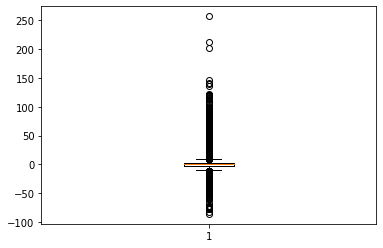

In [32]:
#Checking for outliers
plt.boxplot(Main_train['delay'])

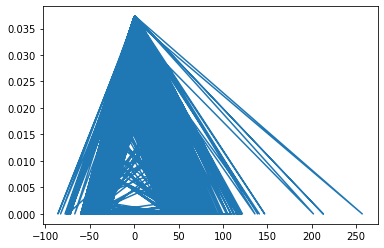

In [33]:
mean = statistics.mean(Main_train['delay'])
sd = statistics.stdev(Main_train['delay'])
plt.plot(Main_train['delay'], norm.pdf(Main_train['delay'], mean, sd))
plt.show()

In [34]:
#3 Dealays are above 200... replacing them with their median
Main_train.sort_values('delay', ascending=False)

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,delay
42396,U001,0200740737,THE WA associates,2019-10-29,2019.0,1.928555e+09,2019-01-05,2019-01-03,2019-02-14,USD,62113.17,2019-01-05,NAD4,1.928555e+09,0,257
42593,U001,CCU013,KRAFT F trust,2019-08-30,2019.0,1.928684e+09,2019-01-29,2019-01-25,2019-01-29,USD,453.09,2019-01-29,NAX2,1.928684e+09,0,213
14174,CA02,0100030194,AMAZO,2019-11-29,2019.0,2.960539e+09,2019-04-30,2019-04-30,2019-05-11,CAD,2472.30,2019-05-01,CA10,2.960539e+09,0,202
14969,U013,CC5050,H.J. HE co,2019-12-27,2019.0,1.991829e+09,2019-06-18,2019-06-18,2019-08-02,USD,25405.65,2019-06-18,NAVF,1.991829e+09,0,147
8469,U001,CCU013,KRAFT F trust,2019-08-30,2019.0,1.929109e+09,2019-04-11,2019-04-08,2019-04-11,USD,24449.05,2019-04-11,NAX2,1.929109e+09,0,141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2268,U001,200777735,NASH,2019-07-22,2019.0,1.929589e+09,2019-07-08,2019-07-09,2019-10-06,USD,318.83,2019-07-08,NAVR,1.929589e+09,0,-76
39496,U001,0200255873,GRIFF trust,2019-02-12,2019.0,1.928679e+09,2019-01-30,2019-01-24,2019-04-30,USD,6931.01,2019-01-30,NAVM,1.928679e+09,0,-77
1578,U001,0200255873,GRIFF llc,2019-06-18,2019.0,1.929411e+09,2019-06-06,2019-06-03,2019-09-04,USD,20001.00,2019-06-06,NAVM,1.929411e+09,0,-78
35788,U001,0100000048,GEOR trust,2019-08-26,2019.0,1.929758e+09,2019-08-19,2019-08-17,2019-11-17,USD,31659.44,2019-08-19,NAVM,1.929758e+09,0,-83


In [35]:
group_cust_number = Main_train.groupby('cust_number')
group_cust_number.first()

,business_code,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,delay
cust_number,,,,,,,,,,,,,,,
0100000048,U001,GEOR us,2019-06-26,2019.0,1.928829e+09,2019-02-22,2019-02-20,2019-05-23,USD,32932.38,2019-02-22,NAVM,1.928829e+09,0,34
0100000051,U001,GREE corp,2019-01-03,2019.0,1.928544e+09,2018-12-31,2018-12-31,2019-01-30,USD,31588.20,2018-12-31,NAD5,1.928544e+09,0,-27
0100000158,U001,CASC us,2019-09-18,2019.0,1.929431e+09,2019-06-06,2019-06-04,2019-09-04,USD,40005.08,2019-06-06,NAVM,1.929431e+09,0,14
0100000217,U001,MRS S trust,2019-06-25,2019.0,1.929438e+09,2019-06-11,2019-06-05,2019-06-26,USD,34268.26,2019-06-11,NAA8,1.929438e+09,0,-1
0100000222,U001,SMITHFIE co,2019-02-04,2019.0,1.928645e+09,2019-01-23,2019-01-18,2019-02-07,USD,17603.45,2019-01-23,NAA8,1.928645e+09,0,-3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CC7470,U013,ALIMENTO associates,2019-06-29,2019.0,1.991820e+09,2019-01-23,2019-01-21,2019-03-09,USD,17804.12,2019-01-23,NAVF,1.991820e+09,0,112
CCCA02,U001,KRAFT llc,2019-06-28,2019.0,1.929314e+09,2019-05-16,2019-05-14,2019-06-20,USD,14402.44,2019-05-16,NAG2,1.929314e+09,0,8
CCU001,CA02,KRAFT in,2019-11-27,2019.0,2.960585e+09,2019-10-21,2019-10-21,2019-11-26,CAD,27568.20,2019-10-22,NAG2,2.960585e+09,0,1


In [36]:
print(group_cust_number.get_group('0200740737').delay.median())
print(group_cust_number.get_group('CCU013').delay.median())
print(group_cust_number.get_group('0100030194').delay.median())

139.5
42.0
5.0


In [37]:
#Replacing the outliers with their respective delay median
Main_train.at[42396,'delay']= 139
Main_train.at[42593,'delay']= 42
Main_train.at[14174,'delay']= 5

In [38]:
Main_train.sort_values('delay', ascending=False)

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,delay
14969,U013,CC5050,H.J. HE co,2019-12-27,2019.0,1.991829e+09,2019-06-18,2019-06-18,2019-08-02,USD,25405.65,2019-06-18,NAVF,1.991829e+09,0,147
8469,U001,CCU013,KRAFT F trust,2019-08-30,2019.0,1.929109e+09,2019-04-11,2019-04-08,2019-04-11,USD,24449.05,2019-04-11,NAX2,1.929109e+09,0,141
42396,U001,0200740737,THE WA associates,2019-10-29,2019.0,1.928555e+09,2019-01-05,2019-01-03,2019-02-14,USD,62113.17,2019-01-05,NAD4,1.928555e+09,0,139
41494,U001,CCCA02,KRAFT llc,2019-08-30,2019.0,1.928887e+09,2019-03-09,2019-03-02,2019-04-13,USD,65098.24,2019-03-09,NAG2,1.928887e+09,0,139
7828,U013,CC6964,FOODST us,2019-08-28,2019.0,1.991822e+09,2019-02-28,2019-02-28,2019-04-14,USD,74732.47,2019-02-28,NAVF,1.991822e+09,0,136
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2268,U001,200777735,NASH,2019-07-22,2019.0,1.929589e+09,2019-07-08,2019-07-09,2019-10-06,USD,318.83,2019-07-08,NAVR,1.929589e+09,0,-76
39496,U001,0200255873,GRIFF trust,2019-02-12,2019.0,1.928679e+09,2019-01-30,2019-01-24,2019-04-30,USD,6931.01,2019-01-30,NAVM,1.928679e+09,0,-77
1578,U001,0200255873,GRIFF llc,2019-06-18,2019.0,1.929411e+09,2019-06-06,2019-06-03,2019-09-04,USD,20001.00,2019-06-06,NAVM,1.929411e+09,0,-78
35788,U001,0100000048,GEOR trust,2019-08-26,2019.0,1.929758e+09,2019-08-19,2019-08-17,2019-11-17,USD,31659.44,2019-08-19,NAVM,1.929758e+09,0,-83


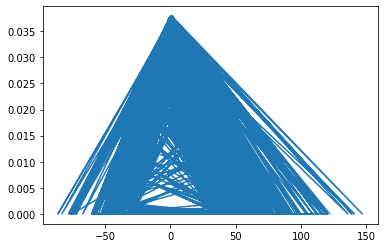

In [39]:
mean = statistics.mean(Main_train['delay'])
sd = statistics.stdev(Main_train['delay'])
plt.plot(Main_train['delay'], norm.pdf(Main_train['delay'], mean, sd))
plt.show()

# Splitting

In [40]:
Main_train.sort_values(by="document_create_date", ascending = True,inplace = True )
Main_train

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,delay
2243,U013,0140103311,GLOBA foundation,2019-01-29,2019.0,1.991820e+09,2018-12-30,2018-12-26,2019-01-29,USD,1778.56,2018-12-30,NAVE,1.991820e+09,0,0
44795,U013,0140101682,SUPERVAL llc,2019-02-14,2019.0,1.991820e+09,2018-12-31,2018-12-27,2019-01-30,USD,826.45,2018-12-31,NAVE,1.991820e+09,0,15
26578,U013,0140103311,GLOBA llc,2019-01-29,2019.0,1.991820e+09,2019-01-01,2018-12-28,2019-01-31,USD,43054.25,2019-01-01,NAVE,1.991820e+09,0,-2
45683,U013,0140103392,SOLOM in,2019-01-22,2019.0,1.991819e+09,2019-01-01,2018-12-28,2019-01-31,USD,3622.57,2019-01-01,NAVE,1.991819e+09,0,-9
7932,U001,0200769623,WAL-MAR us,2019-01-09,2019.0,1.928542e+09,2018-12-30,2018-12-29,2019-01-14,USD,32531.72,2018-12-30,NAH4,1.928542e+09,0,-5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49921,U001,0200707822,PUBLI trust,2020-03-12,2020.0,1.930577e+09,2020-02-26,2020-02-27,2020-03-12,USD,86153.88,2020-02-26,NAA8,1.930577e+09,0,0
7376,U001,0200515231,US foundation,2020-03-13,2020.0,1.930577e+09,2020-02-26,2020-02-27,2020-03-12,USD,44969.82,2020-02-26,NAA8,1.930577e+09,0,1
40751,U001,0200794332,COST associates,2020-03-12,2020.0,1.930576e+09,2020-02-27,2020-02-27,2020-03-13,USD,51407.61,2020-02-27,NAAX,1.930576e+09,0,-1
44474,U001,0200331749,SYSC trust,2020-03-16,2020.0,1.930577e+09,2020-02-26,2020-02-27,2020-03-12,USD,8976.54,2020-02-26,NAA8,1.930577e+09,0,4


In [41]:
# Converting the Main_train into X and y so that we can pass it onto train_test_split function
# X --> contains the dataframe without the target i.e delay
x = Main_train.drop('delay',axis=1)
# Y --> contains only the target value 
y = Main_train['delay']

In [42]:
x.shape, y.shape

((39127, 15), (39127,))

In [43]:
#splitting the data into two part -- doing a 70:30 split i.e 30% data fed to intermediate test data set
x_train,x_inter_test,y_train,y_inter_test = train_test_split(x,y,test_size=0.3,random_state=0 , shuffle = False)

In [44]:
x_train.shape, x_inter_test.shape

((27388, 15), (11739, 15))

In [45]:
#splitting the inter_test data further into two part -- doing a 50:50 split 
x_val,x_test,y_val,y_test = train_test_split(x_inter_test,y_inter_test,test_size=0.5,random_state=0 , shuffle = False)

In [46]:
x_val.shape,x_test.shape

((5869, 15), (5870, 15))

# EDA

In [47]:
x_train.describe()

,buisness_year,doc_id,total_open_amount,invoice_id,isOpen
count,27388.0,2.738800e+04,27388.000000,2.738800e+04,27388.0
mean,2019.0,2.014453e+09,31395.057117,2.014453e+09,0.0
std,0.0,2.820687e+08,39614.084749,2.820687e+08,0.0
min,2019.0,1.928502e+09,5.360000,1.928502e+09,0.0
25%,2019.0,1.928991e+09,4422.345000,1.928991e+09,0.0
50%,2019.0,1.929412e+09,16901.460000,1.929412e+09,0.0
75%,2019.0,1.929767e+09,45426.620000,1.929767e+09,0.0
max,2019.0,2.960585e+09,895315.200000,2.960585e+09,0.0


In [48]:
x_test.describe()

,buisness_year,doc_id,total_open_amount,invoice_id,isOpen
count,5870.000000,5.870000e+03,5870.000000,5.870000e+03,5870.0
mean,2019.866780,2.007212e+09,32203.423024,2.007212e+09,0.0
std,0.339841,2.691649e+08,38699.782480,2.691649e+08,0.0
min,2019.000000,1.930245e+09,0.180000,1.930245e+09,0.0
25%,2020.000000,1.930371e+09,4723.500000,1.930371e+09,0.0
50%,2020.000000,1.930446e+09,17319.000000,1.930446e+09,0.0
75%,2020.000000,1.930524e+09,47021.045000,1.930524e+09,0.0
max,2020.000000,2.960618e+09,378196.690000,2.960618e+09,0.0


In [49]:
x_val.describe()

,buisness_year,doc_id,total_open_amount,invoice_id,isOpen
count,5869.0,5.869000e+03,5869.000000,5.869000e+03,5869.0
mean,2019.0,2.015573e+09,34587.388662,2.015573e+09,0.0
std,0.0,2.830909e+08,42381.496961,2.830909e+08,0.0
min,2019.0,1.929968e+09,4.290000,1.929968e+09,0.0
25%,2019.0,1.930045e+09,5859.240000,1.930045e+09,0.0
50%,2019.0,1.930129e+09,18937.830000,1.930129e+09,0.0
75%,2019.0,1.930195e+09,49666.100000,1.930195e+09,0.0
max,2019.0,2.960599e+09,773749.440000,2.960599e+09,0.0


In [50]:
# function will delete a column from train , val and test
def col_del(col ,train = x_train,val = x_val,test = x_test):
    train.drop(col, axis =1,inplace=True)
    val.drop(col,axis=1 , inplace=True)
    test.drop(col,axis=1 , inplace=True)

    return train,val,test

In [51]:
# we get to see that isOpen has just one value for all data so we drop it
x_train ,x_val, x_test = col_del(['isOpen'])

<AxesSubplot:xlabel='total_open_amount', ylabel='Density'>

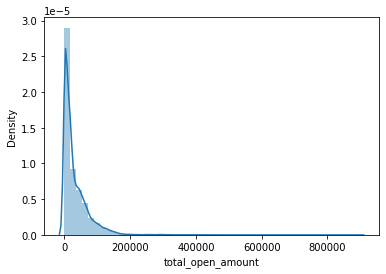

In [52]:
sns.distplot(x_train['total_open_amount'])

In [53]:
# This shows the total_open_amount column is totally right skewed. Thus applying Log transform to improve it
x_train['total_open_amount'].skew()

3.223419711216179

In [54]:
def logTransform(x):
    return np.log(x)

x_train['log_open_amount'] = x_train['total_open_amount'].apply(logTransform)
x_test['log_open_amount'] = x_test['total_open_amount'].apply(logTransform)
x_val['log_open_amount'] = x_val['total_open_amount'].apply(logTransform)

In [55]:
x_train['log_open_amount'].skew()

-0.9346924396708828

<AxesSubplot:xlabel='log_open_amount', ylabel='Density'>

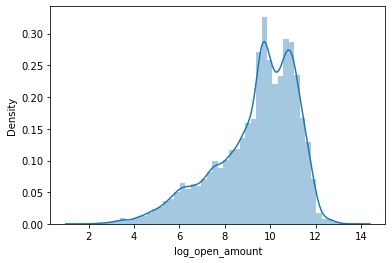

In [56]:
sns.distplot(x_train['log_open_amount'])

In [57]:
print(dict(x_train['business_code'].value_counts()))
print(dict(x_test['business_code'].value_counts()))
print(dict(x_val['business_code'].value_counts()))

{'U001': 24689, 'CA02': 2234, 'U013': 364, 'other': 101}
{'U001': 5357, 'CA02': 433, 'U013': 66, 'other': 14}
{'U001': 5323, 'CA02': 483, 'U013': 49, 'other': 14}


<AxesSubplot:xlabel='business_code', ylabel='delay'>

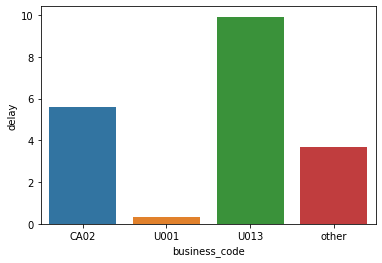

In [58]:
#Graph shows all code delays but U001 delays the least considering its counts 
check = pd.DataFrame(Main_train.groupby(['business_code'], axis=0, as_index=False)['delay'].mean())
sns.barplot(x="business_code", y="delay",data=check)

In [59]:
print(dict(x_train['invoice_currency'].value_counts()))
print(dict(x_test['invoice_currency'].value_counts()))
print(dict(x_val['invoice_currency'].value_counts()))

{'USD': 25154, 'CAD': 2234}
{'USD': 5437, 'CAD': 433}
{'USD': 5386, 'CAD': 483}


<AxesSubplot:xlabel='invoice_currency', ylabel='delay'>

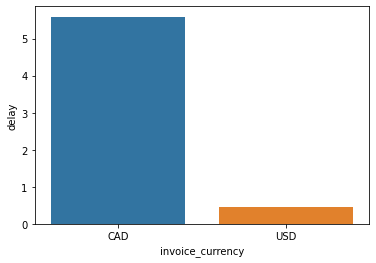

In [60]:
#Graph shows CAD currency payments delays more 
check1 = pd.DataFrame(Main_train.groupby(['invoice_currency'], axis=0, as_index=False)['delay'].mean())
sns.barplot(x="invoice_currency", y="delay",data=check1)

In [61]:
print(dict(x_train['buisness_year'].value_counts()))
print(dict(x_test['buisness_year'].value_counts()))
print(dict(x_val['buisness_year'].value_counts()))

{2019.0: 27388}
{2020.0: 5088, 2019.0: 782}
{2019.0: 5869}


In [62]:
#Dropping Bussiness Year as it won't contribute in our model
x_train ,x_val, x_test = col_del(['buisness_year'])

In [63]:
#Dropping total_open_amount as log_open_amount is already been made
x_train ,x_val, x_test = col_del(['total_open_amount'])

<AxesSubplot:xlabel='delay', ylabel='Density'>

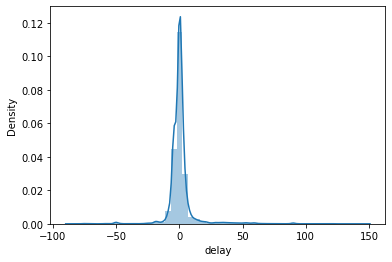

In [64]:
#Delay column is pretty much symmetric meaning normalised already.
sns.distplot(Main_train['delay'])

In [65]:
x_train

,business_code,cust_number,name_customer,clear_date,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,baseline_create_date,cust_payment_terms,invoice_id,log_open_amount
2243,U013,0140103311,GLOBA foundation,2019-01-29,1.991820e+09,2018-12-30,2018-12-26,2019-01-29,USD,2018-12-30,NAVE,1.991820e+09,7.483559
44795,U013,0140101682,SUPERVAL llc,2019-02-14,1.991820e+09,2018-12-31,2018-12-27,2019-01-30,USD,2018-12-31,NAVE,1.991820e+09,6.717139
26578,U013,0140103311,GLOBA llc,2019-01-29,1.991820e+09,2019-01-01,2018-12-28,2019-01-31,USD,2019-01-01,NAVE,1.991820e+09,10.670216
45683,U013,0140103392,SOLOM in,2019-01-22,1.991819e+09,2019-01-01,2018-12-28,2019-01-31,USD,2019-01-01,NAVE,1.991819e+09,8.194939
7932,U001,0200769623,WAL-MAR us,2019-01-09,1.928542e+09,2018-12-30,2018-12-29,2019-01-14,USD,2018-12-30,NAH4,1.928542e+09,10.389971
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22684,U001,0200881076,ALBERT,2019-11-14,1.929971e+09,2019-10-05,2019-10-05,2019-11-14,USD,2019-10-05,NAWU,1.929971e+09,8.804091
6405,U001,0200762301,C&S WH co,2019-10-22,1.929973e+09,2019-10-07,2019-10-05,2019-10-22,USD,2019-10-07,NAC6,1.929973e+09,8.216639
28596,U001,0200752302,KROGER llc,2019-10-21,1.929972e+09,2019-10-04,2019-10-05,2019-10-19,USD,2019-10-04,NAA8,1.929972e+09,10.490255
19215,other,0200501669,WAL MA in,2019-11-18,1.990568e+09,2019-10-07,2019-10-05,2019-11-11,USD,2019-10-07,NAG2,1.990568e+09,9.703919


In [66]:
# custom function to give info of all the dataframes 
def df_info(train = x_train,val = x_val,test = x_test):
    print("************Train Data Info****************")
    print(train.info())
    print("************Shape of All Df****************")
    print(train.shape,val.shape,test.shape)
    print("************Train Null Count****************")
    print(train.isna().sum())
    print("************Test Null Count ****************")
    print(test.isna().sum())    
    print("************Val Null Count ****************")
    print(val.isna().sum())

# Feature Engineering

In [67]:
#Encoding business_code using label encoder
business_code_encoder = LabelEncoder()
business_code_encoder.fit(x_train['business_code'])
x_train['business_code_enc'] = business_code_encoder.transform(x_train['business_code'])

In [68]:
x_val['business_code_enc'] = business_code_encoder.transform(x_val['business_code'])
x_test['business_code_enc'] = business_code_encoder.transform(x_test['business_code'])

In [69]:
# Dropping business_code as we have encoded it
x_train ,x_val, x_test = col_del(['business_code'])

In [70]:
#Encoding invoice_currency using label encoder
invoice_currency_encoder = LabelEncoder()
invoice_currency_encoder.fit(x_train['invoice_currency'])
x_train['invoice_currency_enc'] = invoice_currency_encoder.transform(x_train['invoice_currency'])

In [71]:
x_test['invoice_currency_enc'] = invoice_currency_encoder.transform(x_test['invoice_currency'])
x_val['invoice_currency_enc'] = invoice_currency_encoder.transform(x_val['invoice_currency'])

In [72]:
# Dropping invoice_currency as we have encoded it
x_train ,x_val, x_test = col_del(['invoice_currency'])

In [73]:
# Splitting document_create_date into day,month,year and quarter
x_train['document_create_day'] = x_train['document_create_date'].dt.day
x_train['document_create_month'] = x_train['document_create_date'].dt.month
x_train['document_create_year'] = x_train['document_create_date'].dt.year
x_train['document_create_quarter']= x_train['document_create_date'].dt.quarter


x_test['document_create_day'] = x_test['document_create_date'].dt.day
x_test['document_create_month'] = x_test['document_create_date'].dt.month
x_test['document_create_year'] = x_test['document_create_date'].dt.year
x_test['document_create_quarter'] = x_test['document_create_date'].dt.quarter


x_val['document_create_day'] = x_val['document_create_date'].dt.day
x_val['document_create_month'] = x_val['document_create_date'].dt.month
x_val['document_create_year'] = x_val['document_create_date'].dt.year
x_val['document_create_quarter'] = x_val['document_create_date'].dt.quarter


In [74]:
# Dropping document_create_date as we have featured it in various columns
x_train ,x_val, x_test = col_del(['document_create_date'])

In [75]:
x_train

,cust_number,name_customer,clear_date,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,invoice_id,log_open_amount,business_code_enc,invoice_currency_enc,document_create_day,document_create_month,document_create_year,document_create_quarter
2243,0140103311,GLOBA foundation,2019-01-29,1.991820e+09,2018-12-30,2019-01-29,2018-12-30,NAVE,1.991820e+09,7.483559,2,1,26,12,2018,4
44795,0140101682,SUPERVAL llc,2019-02-14,1.991820e+09,2018-12-31,2019-01-30,2018-12-31,NAVE,1.991820e+09,6.717139,2,1,27,12,2018,4
26578,0140103311,GLOBA llc,2019-01-29,1.991820e+09,2019-01-01,2019-01-31,2019-01-01,NAVE,1.991820e+09,10.670216,2,1,28,12,2018,4
45683,0140103392,SOLOM in,2019-01-22,1.991819e+09,2019-01-01,2019-01-31,2019-01-01,NAVE,1.991819e+09,8.194939,2,1,28,12,2018,4
7932,0200769623,WAL-MAR us,2019-01-09,1.928542e+09,2018-12-30,2019-01-14,2018-12-30,NAH4,1.928542e+09,10.389971,1,1,29,12,2018,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22684,0200881076,ALBERT,2019-11-14,1.929971e+09,2019-10-05,2019-11-14,2019-10-05,NAWU,1.929971e+09,8.804091,1,1,5,10,2019,4
6405,0200762301,C&S WH co,2019-10-22,1.929973e+09,2019-10-07,2019-10-22,2019-10-07,NAC6,1.929973e+09,8.216639,1,1,5,10,2019,4
28596,0200752302,KROGER llc,2019-10-21,1.929972e+09,2019-10-04,2019-10-19,2019-10-04,NAA8,1.929972e+09,10.490255,1,1,5,10,2019,4
19215,0200501669,WAL MA in,2019-11-18,1.990568e+09,2019-10-07,2019-11-11,2019-10-07,NAG2,1.990568e+09,9.703919,3,1,5,10,2019,4


In [76]:
#Encoding cust_payment_terms using label encoder
cust_payment_terms_encoder = LabelEncoder()
cust_payment_terms_encoder.fit(Main_train['cust_payment_terms'])
x_train['cust_payment_terms_enc'] = cust_payment_terms_encoder.transform(x_train['cust_payment_terms'])
x_test['cust_payment_terms_enc'] = cust_payment_terms_encoder.transform(x_test['cust_payment_terms'])
x_val['cust_payment_terms_enc'] = cust_payment_terms_encoder.transform(x_val['cust_payment_terms'])

In [77]:
# Dropping cust_payment_terms as we have encoded it
x_train ,x_val, x_test = col_del(['cust_payment_terms'])

In [78]:
#Encoding cust_number using label encoder
cust_number_encoder = LabelEncoder()
cust_number_encoder.fit(Main_train['cust_number'])
x_train['cust_number_enc'] = cust_number_encoder.transform(x_train['cust_number'])
x_test['cust_number_enc'] = cust_number_encoder.transform(x_test['cust_number'])
x_val['cust_number_enc'] = cust_number_encoder.transform(x_val['cust_number'])

In [79]:
# Dropping cust_number as we have encoded it
x_train ,x_val, x_test = col_del(['cust_number'])

In [80]:
x_train.dtypes

name_customer                      object
clear_date                 datetime64[ns]
doc_id                            float64
posting_date                       object
due_in_date                datetime64[ns]
baseline_create_date       datetime64[ns]
invoice_id                        float64
log_open_amount                   float64
business_code_enc                   int32
invoice_currency_enc                int32
document_create_day                 int64
document_create_month               int64
document_create_year                int64
document_create_quarter             int64
cust_payment_terms_enc              int32
cust_number_enc                     int32
dtype: object

In [81]:
# Dropping non-featured columns
x_train ,x_val, x_test = col_del(['name_customer','clear_date','doc_id','posting_date','due_in_date','baseline_create_date','invoice_id'])

In [82]:
x_train

,log_open_amount,business_code_enc,invoice_currency_enc,document_create_day,document_create_month,document_create_year,document_create_quarter,cust_payment_terms_enc,cust_number_enc
2243,7.483559,2,1,26,12,2018,4,61,339
44795,6.717139,2,1,27,12,2018,4,61,333
26578,10.670216,2,1,28,12,2018,4,61,339
45683,8.194939,2,1,28,12,2018,4,61,343
7932,10.389971,1,1,29,12,2018,4,36,843
...,...,...,...,...,...,...,...,...,...
22684,8.804091,1,1,5,10,2019,4,70,961
6405,8.216639,1,1,5,10,2019,4,27,827
28596,10.490255,1,1,5,10,2019,4,21,805
19215,9.703919,3,1,5,10,2019,4,34,607


<AxesSubplot:>

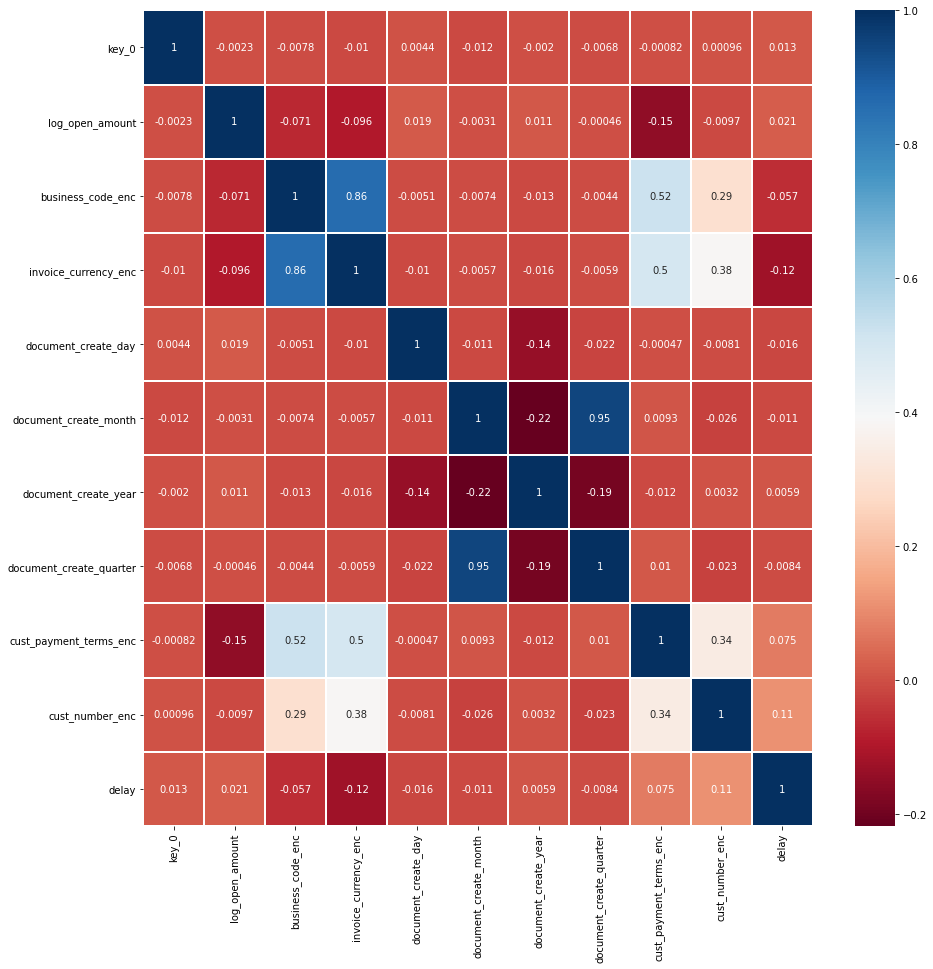

In [83]:
#Heatmap looks perfect
colormap = plt.cm.RdBu
plt.figure(figsize=(15,15))
sns.heatmap(x_train.merge(y_train , on = x_train.index ).corr(), annot=True,linewidths=0.1,cmap=colormap)

In [84]:
df_info()

************Train Data Info****************
<class 'pandas.core.frame.DataFrame'>
Int64Index: 27388 entries, 2243 to 13823
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   log_open_amount          27388 non-null  float64
 1   business_code_enc        27388 non-null  int32  
 2   invoice_currency_enc     27388 non-null  int32  
 3   document_create_day      27388 non-null  int64  
 4   document_create_month    27388 non-null  int64  
 5   document_create_year     27388 non-null  int64  
 6   document_create_quarter  27388 non-null  int64  
 7   cust_payment_terms_enc   27388 non-null  int32  
 8   cust_number_enc          27388 non-null  int32  
dtypes: float64(1), int32(4), int64(4)
memory usage: 1.7 MB
None
************Shape of All Df****************
(27388, 9) (5869, 9) (5870, 9)
************Train Null Count****************
log_open_amount            0
business_code_enc          0
invoice_

# Modelling

In [85]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)

LinearRegression()

In [86]:
train_predict1 = linear_model.predict(x_val)

In [87]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_val, train_predict1, squared=False)

6.922212666799602

# Decision Tree

In [88]:
from sklearn.tree import DecisionTreeRegressor
regressor_model = DecisionTreeRegressor(random_state=0 , max_depth=5)

In [89]:
regressor_model.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=5, random_state=0)

In [90]:
train_predict2 = regressor_model.predict(x_val)

In [91]:
mean_squared_error(y_val, train_predict2, squared=False)

5.735679634402914

In [92]:
test_predict = regressor_model.predict(x_test)
mean_squared_error(y_test, test_predict, squared=False)

7.972801751779666

In [93]:
Main_test

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
1,U001,0200029010,KROG,NaT,2020.0,1.930583e+09,2020-02-28,2020-02-29,2020-03-14,USD,RV,1.0,10318.00,2020-02-28,NAA8,1.930583e+09,1
2,U001,0200418007,AM corporation,NaT,2020.0,1.930846e+09,2020-05-04,2020-05-02,2020-05-19,USD,RV,1.0,15452.12,2020-05-04,NAA8,1.930846e+09,1
4,CA02,0140104409,LOB corporation,NaT,2020.0,2.960622e+09,2020-03-23,2020-03-24,2020-04-03,CAD,RV,1.0,25182.72,2020-03-24,CA10,2.960622e+09,1
6,CA02,0140104249,SOB foundation,NaT,2020.0,2.960624e+09,2020-03-29,2020-03-29,2020-04-16,CAD,RV,1.0,36490.35,2020-04-06,CA10,2.960624e+09,1
8,U001,0200744019,TARG systems,NaT,2020.0,1.930827e+09,2020-04-27,2020-04-25,2020-05-12,USD,RV,1.0,1140.26,2020-04-27,NAA8,1.930827e+09,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49952,U001,0200769623,WAL-MAR associates,NaT,2020.0,1.930839e+09,2020-04-30,2020-04-29,2020-05-15,USD,RV,1.0,29363.02,2020-04-30,NAH4,1.930839e+09,1
49971,U001,0200744019,TARG in,NaT,2020.0,1.930825e+09,2020-04-25,2020-04-24,2020-05-10,USD,RV,1.0,15817.60,2020-04-25,NAA8,1.930825e+09,1
49984,U001,0200769623,WAL-MAR associates,NaT,2020.0,1.930838e+09,2020-04-29,2020-04-29,2020-05-14,USD,RV,1.0,9649.84,2020-04-29,NAH4,1.930838e+09,1
49996,U001,0200769623,WAL-MAR,NaT,2020.0,1.930716e+09,2020-03-30,2020-03-29,2020-04-14,USD,RV,1.0,57735.71,2020-03-30,NAH4,1.930716e+09,1


In [94]:
x_main_test = Main_test.drop(['clear_date'],axis=1)
x_main_test

# Dropping clear_date from Main_test
Main_test.drop(['clear_date'], inplace =True,axis=1)

# Making x_main_test same as x_train by following same steps performed above

In [95]:
x_main_test.isna().sum()

business_code           0
cust_number             0
name_customer           0
buisness_year           0
doc_id                  0
posting_date            0
document_create_date    0
due_in_date             0
invoice_currency        0
document type           0
posting_id              0
total_open_amount       0
baseline_create_date    0
cust_payment_terms      0
invoice_id              0
isOpen                  0
dtype: int64

In [96]:
x_main_test.drop(['document type'], axis = 1,inplace=True)

In [97]:
x_main_test.drop(['posting_id'], axis = 1,inplace=True)

In [98]:
x_main_test['business_code'].value_counts()

U001    9199
CA02     711
U013      61
U002      25
U005       3
U007       1
Name: business_code, dtype: int64

In [99]:
x_main_test.replace(['U002', 'U005', 'U007'], 'other',inplace=True)

In [100]:
x_main_test.drop(['isOpen'], axis = 1,inplace=True)

In [101]:
x_main_test['log_open_amount'] = x_main_test['total_open_amount'].apply(logTransform)

In [102]:
x_main_test.drop(['total_open_amount'], axis = 1,inplace=True)

In [103]:
x_main_test.drop(['buisness_year'], axis = 1,inplace=True)

In [104]:
x_main_test['business_code_enc'] = business_code_encoder.transform(x_main_test['business_code'])

In [105]:
x_main_test['invoice_currency_enc'] = invoice_currency_encoder.transform(x_main_test['invoice_currency'])

In [106]:
x_main_test.drop(['business_code'], axis = 1,inplace=True)

In [107]:
x_main_test.drop(['invoice_currency'], axis = 1,inplace=True)

In [108]:
x_main_test['document_create_day'] = x_main_test['document_create_date'].dt.day
x_main_test['document_create_month'] = x_main_test['document_create_date'].dt.month
x_main_test['document_create_year'] = x_main_test['document_create_date'].dt.year
x_main_test['document_create_quarter']= x_main_test['document_create_date'].dt.quarter

In [109]:
x_main_test.drop(['document_create_date'], axis = 1,inplace=True)

In [110]:
# New classes of cust_payment_terms are there in the x_main_test set
temp = set(x_main_test['cust_payment_terms'])-set(cust_payment_terms_encoder.classes_)
for items in temp:
    cust_payment_terms_encoder.classes_= np.append(cust_payment_terms_encoder.classes_,items)

x_main_test['cust_payment_terms_enc'] = cust_payment_terms_encoder.transform(x_main_test['cust_payment_terms'])

In [111]:
# New classes of cust_number are there in the x_main_test set
temp1 = set(x_main_test['cust_number'])-set(cust_number_encoder.classes_)
for items in temp1:
    cust_number_encoder.classes_= np.append(cust_number_encoder.classes_,items)

x_main_test['cust_number_enc'] = cust_number_encoder.transform(x_main_test['cust_number'])

In [112]:
x_main_test.drop(['cust_payment_terms'], axis = 1,inplace=True)

In [113]:
x_main_test.drop(['cust_number'], axis = 1,inplace=True)

In [114]:
x_main_test.drop(['name_customer'], axis = 1,inplace=True)

In [115]:
x_main_test.drop(['doc_id'], axis = 1,inplace=True)

In [116]:
x_main_test.drop(['posting_date'], axis = 1,inplace=True)

In [117]:
x_main_test.drop(['baseline_create_date'], axis = 1,inplace=True)

In [118]:
x_main_test.drop(['invoice_id'], axis = 1,inplace=True)

In [119]:
#Due date will used later for calculating predicted_date
test_due_date = x_main_test['due_in_date']
test_due_date

1       2020-03-14
2       2020-05-19
4       2020-04-03
6       2020-04-16
8       2020-05-12
           ...    
49952   2020-05-15
49971   2020-05-10
49984   2020-05-14
49996   2020-04-14
49998   2020-04-16
Name: due_in_date, Length: 10000, dtype: datetime64[ns]

In [120]:
x_main_test.drop(['due_in_date'], axis = 1,inplace=True)

In [121]:
x_main_test.shape

(10000, 9)

# Main Test Modeling and Predictions

In [122]:
test_result = regressor_model.predict(x_main_test)

In [123]:
test_result = pd.Series(test_result,name='Predicted_delay')

In [124]:
test_result

0       0.892506
1       0.892506
2       3.629001
3       3.629001
4       0.892506
          ...   
9995   -1.805216
9996    0.892506
9997   -1.805216
9998   -1.805216
9999   -1.805216
Name: Predicted_delay, Length: 10000, dtype: float64

In [125]:
#Function for putting delays in specific aging bucked
def Age(x):
    temp = []
    for i in list(x):
        if i<0.0 :
            temp.append("Payment done before due date.")
        elif i<=15.0:
            temp.append("Payment done with a delay of less than 15 days.")
        elif i>15.0 and i<=30.0:
            temp.append("Payment done 15 days after due date.")
        elif i>30.0 and i<60.0:
            temp.append("Payment done 30 days after due date.")
        else:
            temp.append("Payment done much after due date.")
    return temp

buck = Age(test_result)
agingbucket = pd.DataFrame()
agingbucket['Predicted_delay1'] = test_result
agingbucket['Bucket'] = buck
agingbucket

,Predicted_delay1,Bucket
0,0.892506,Payment done with a delay of less than 15 days.
1,0.892506,Payment done with a delay of less than 15 days.
2,3.629001,Payment done with a delay of less than 15 days.
3,3.629001,Payment done with a delay of less than 15 days.
4,0.892506,Payment done with a delay of less than 15 days.
...,...,...
9995,-1.805216,Payment done before due date.
9996,0.892506,Payment done with a delay of less than 15 days.
9997,-1.805216,Payment done before due date.
9998,-1.805216,Payment done before due date.


In [126]:
test_due_date

1       2020-03-14
2       2020-05-19
4       2020-04-03
6       2020-04-16
8       2020-05-12
           ...    
49952   2020-05-15
49971   2020-05-10
49984   2020-05-14
49996   2020-04-14
49998   2020-04-16
Name: due_in_date, Length: 10000, dtype: datetime64[ns]

In [127]:
# resetting the index of x_main_test so that we can merge Predicted_delay series with it
x_main_test.reset_index(drop=True,inplace=True)

In [128]:
Fin = x_main_test.merge(test_result, on = x_main_test.index )
Fin

,key_0,log_open_amount,business_code_enc,invoice_currency_enc,document_create_day,document_create_month,document_create_year,document_create_quarter,cust_payment_terms_enc,cust_number_enc,Predicted_delay
0,0,9.241645,1,1,29,2,2020,1,21,445,0.892506
1,1,9.645501,1,1,2,5,2020,2,21,579,0.892506
2,2,10.133913,0,0,24,3,2020,1,6,377,3.629001
3,3,10.504803,0,0,29,3,2020,1,6,367,3.629001
4,4,7.039012,1,1,25,4,2020,2,21,789,0.892506
...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,10.287491,1,1,29,4,2020,2,36,843,-1.805216
9996,9996,9.668879,1,1,24,4,2020,2,21,789,0.892506
9997,9997,9.174697,1,1,29,4,2020,2,36,843,-1.805216
9998,9998,10.963631,1,1,29,3,2020,1,36,843,-1.805216


In [129]:
# resetting the index of Fin so that we can merge test_due_date series with it
Fin.drop(['key_0'], axis = 1,inplace=True)
Final = Fin.merge(test_due_date, on = Fin.index )
Final

,key_0,log_open_amount,business_code_enc,invoice_currency_enc,document_create_day,document_create_month,document_create_year,document_create_quarter,cust_payment_terms_enc,cust_number_enc,Predicted_delay,due_in_date
0,0,9.241645,1,1,29,2,2020,1,21,445,0.892506,2020-03-14
1,1,9.645501,1,1,2,5,2020,2,21,579,0.892506,2020-05-19
2,2,10.133913,0,0,24,3,2020,1,6,377,3.629001,2020-04-03
3,3,10.504803,0,0,29,3,2020,1,6,367,3.629001,2020-04-16
4,4,7.039012,1,1,25,4,2020,2,21,789,0.892506,2020-05-12
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,10.287491,1,1,29,4,2020,2,36,843,-1.805216,2020-05-15
9996,9996,9.668879,1,1,24,4,2020,2,21,789,0.892506,2020-05-10
9997,9997,9.174697,1,1,29,4,2020,2,36,843,-1.805216,2020-05-14
9998,9998,10.963631,1,1,29,3,2020,1,36,843,-1.805216,2020-04-14


In [130]:
Final['Predicted_delay'].max()

120.0

In [131]:
Final['Predicted_delay'].min()

-31.91304347826087

In [132]:
#Rounding off the delay to int value
Final['Int_Delay'] = Final['Predicted_delay'].round()

In [133]:
Final

,key_0,log_open_amount,business_code_enc,invoice_currency_enc,document_create_day,document_create_month,document_create_year,document_create_quarter,cust_payment_terms_enc,cust_number_enc,Predicted_delay,due_in_date,Int_Delay
0,0,9.241645,1,1,29,2,2020,1,21,445,0.892506,2020-03-14,1.0
1,1,9.645501,1,1,2,5,2020,2,21,579,0.892506,2020-05-19,1.0
2,2,10.133913,0,0,24,3,2020,1,6,377,3.629001,2020-04-03,4.0
3,3,10.504803,0,0,29,3,2020,1,6,367,3.629001,2020-04-16,4.0
4,4,7.039012,1,1,25,4,2020,2,21,789,0.892506,2020-05-12,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,10.287491,1,1,29,4,2020,2,36,843,-1.805216,2020-05-15,-2.0
9996,9996,9.668879,1,1,24,4,2020,2,21,789,0.892506,2020-05-10,1.0
9997,9997,9.174697,1,1,29,4,2020,2,36,843,-1.805216,2020-05-14,-2.0
9998,9998,10.963631,1,1,29,3,2020,1,36,843,-1.805216,2020-04-14,-2.0


In [134]:
#Claculating Predicted date
Final['Predicted_date'] = Final['due_in_date'] + pd.to_timedelta(Final['Int_Delay'],unit='D')

In [135]:
# resetting the index of Final so that we can merge agingbucket series with it
Final.drop(['key_0'], axis = 1,inplace=True)
Final = Final.merge(agingbucket, on = Final.index )

In [136]:
Final.drop(['key_0'], axis = 1,inplace=True)
Final.drop(['Predicted_delay1'], axis = 1,inplace=True)

In [137]:
Final['Bucket'].value_counts()

Payment done with a delay of less than 15 days.    5935
Payment done before due date.                      3974
Payment done 30 days after due date.                 57
Payment done 15 days after due date.                 19
Payment done much after due date.                    15
Name: Bucket, dtype: int64

In [138]:
Final

,log_open_amount,business_code_enc,invoice_currency_enc,document_create_day,document_create_month,document_create_year,document_create_quarter,cust_payment_terms_enc,cust_number_enc,Predicted_delay,due_in_date,Int_Delay,Predicted_date,Bucket
0,9.241645,1,1,29,2,2020,1,21,445,0.892506,2020-03-14,1.0,2020-03-15,Payment done with a delay of less than 15 days.
1,9.645501,1,1,2,5,2020,2,21,579,0.892506,2020-05-19,1.0,2020-05-20,Payment done with a delay of less than 15 days.
2,10.133913,0,0,24,3,2020,1,6,377,3.629001,2020-04-03,4.0,2020-04-07,Payment done with a delay of less than 15 days.
3,10.504803,0,0,29,3,2020,1,6,367,3.629001,2020-04-16,4.0,2020-04-20,Payment done with a delay of less than 15 days.
4,7.039012,1,1,25,4,2020,2,21,789,0.892506,2020-05-12,1.0,2020-05-13,Payment done with a delay of less than 15 days.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,10.287491,1,1,29,4,2020,2,36,843,-1.805216,2020-05-15,-2.0,2020-05-13,Payment done before due date.
9996,9.668879,1,1,24,4,2020,2,21,789,0.892506,2020-05-10,1.0,2020-05-11,Payment done with a delay of less than 15 days.
9997,9.174697,1,1,29,4,2020,2,36,843,-1.805216,2020-05-14,-2.0,2020-05-12,Payment done before due date.
9998,10.963631,1,1,29,3,2020,1,36,843,-1.805216,2020-04-14,-2.0,2020-04-12,Payment done before due date.


In [139]:
rawdata.shape

(50000, 19)

In [140]:
rawdata['clear_date'] = pd.to_datetime(rawdata['clear_date'])
rawdata

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200799367,MCL us,2019-11-21,2019.0,1.930053e+09,2019-10-26,20191025,20191026,20191110.0,USD,RV,1.0,NaN,9613.56,20191026.0,NAA8,1.930053e+09,0
1,U001,0200029010,KROG,NaT,2020.0,1.930583e+09,2020-02-28,20200229,20200228,20200314.0,USD,RV,1.0,NaN,10318.00,20200228.0,NAA8,1.930583e+09,1
2,U001,0200418007,AM corporation,NaT,2020.0,1.930846e+09,2020-05-04,20200502,20200504,20200519.0,USD,RV,1.0,NaN,15452.12,20200504.0,NAA8,1.930846e+09,1
3,U001,200148860,DOLLA llc,2019-07-12,2019.0,1.929548e+09,2019-06-27,20190626,20190627,20190712.0,USD,RV,1.0,NaN,69953.48,20190627.0,NAA8,1.929548e+09,0
4,CA02,0140104409,LOB corporation,NaT,2020.0,2.960622e+09,2020-03-23,20200324,20200323,20200403.0,CAD,RV,1.0,NaN,25182.72,20200324.0,CA10,2.960622e+09,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,0200782001,GORDO co,2019-11-19,2019.0,1.930066e+09,2019-10-29,20191029,20191029,20191113.0,USD,RV,1.0,NaN,55942.88,20191029.0,NAA8,1.930066e+09,0
49996,U001,0200769623,WAL-MAR,NaT,2020.0,1.930716e+09,2020-03-30,20200329,20200330,20200414.0,USD,RV,1.0,NaN,57735.71,20200330.0,NAH4,1.930716e+09,1
49997,U001,0200936373,SUPE corp,2019-12-24,2019.0,1.930247e+09,2019-12-07,20191207,20191207,20191222.0,USD,RV,1.0,NaN,176363.36,20191207.0,NAA8,1.930247e+09,0
49998,U001,0200769623,WAL-MAR co,NaT,2020.0,1.930730e+09,2020-04-01,20200401,20200401,20200416.0,USD,RV,1.0,NaN,31472.70,20200401.0,NAH4,1.930730e+09,1


In [141]:
rawdata[['due_in_date','baseline_create_date','document_create_date','document_create_date.1']] = rawdata[['due_in_date','baseline_create_date','document_create_date','document_create_date.1']].apply(pd.to_datetime, format='%Y%m%d')

In [142]:
rawdata.drop(columns=['area_business'], inplace=True)

In [143]:
test_data = rawdata[rawdata['isOpen'] == 1]
test_data

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
1,U001,0200029010,KROG,NaT,2020.0,1.930583e+09,2020-02-28,2020-02-29,2020-02-28,2020-03-14,USD,RV,1.0,10318.00,2020-02-28,NAA8,1.930583e+09,1
2,U001,0200418007,AM corporation,NaT,2020.0,1.930846e+09,2020-05-04,2020-05-02,2020-05-04,2020-05-19,USD,RV,1.0,15452.12,2020-05-04,NAA8,1.930846e+09,1
4,CA02,0140104409,LOB corporation,NaT,2020.0,2.960622e+09,2020-03-23,2020-03-24,2020-03-23,2020-04-03,CAD,RV,1.0,25182.72,2020-03-24,CA10,2.960622e+09,1
6,CA02,0140104249,SOB foundation,NaT,2020.0,2.960624e+09,2020-03-29,2020-03-29,2020-03-29,2020-04-16,CAD,RV,1.0,36490.35,2020-04-06,CA10,2.960624e+09,1
8,U001,0200744019,TARG systems,NaT,2020.0,1.930827e+09,2020-04-27,2020-04-25,2020-04-27,2020-05-12,USD,RV,1.0,1140.26,2020-04-27,NAA8,1.930827e+09,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49952,U001,0200769623,WAL-MAR associates,NaT,2020.0,1.930839e+09,2020-04-30,2020-04-29,2020-04-30,2020-05-15,USD,RV,1.0,29363.02,2020-04-30,NAH4,1.930839e+09,1
49971,U001,0200744019,TARG in,NaT,2020.0,1.930825e+09,2020-04-25,2020-04-24,2020-04-25,2020-05-10,USD,RV,1.0,15817.60,2020-04-25,NAA8,1.930825e+09,1
49984,U001,0200769623,WAL-MAR associates,NaT,2020.0,1.930838e+09,2020-04-29,2020-04-29,2020-04-29,2020-05-14,USD,RV,1.0,9649.84,2020-04-29,NAH4,1.930838e+09,1
49996,U001,0200769623,WAL-MAR,NaT,2020.0,1.930716e+09,2020-03-30,2020-03-29,2020-03-30,2020-04-14,USD,RV,1.0,57735.71,2020-03-30,NAH4,1.930716e+09,1


In [144]:
test_pred_date = Final['Predicted_date']
test_pred_date

0      2020-03-15
1      2020-05-20
2      2020-04-07
3      2020-04-20
4      2020-05-13
          ...    
9995   2020-05-13
9996   2020-05-11
9997   2020-05-12
9998   2020-04-12
9999   2020-04-14
Name: Predicted_date, Length: 10000, dtype: datetime64[ns]

In [145]:
test_data.reset_index(drop=True,inplace=True)

In [146]:
Final_data = test_data.merge(test_pred_date, on = Fin.index )
Final_data

,key_0,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,Predicted_date
0,0,U001,0200029010,KROG,NaT,2020.0,1.930583e+09,2020-02-28,2020-02-29,2020-02-28,2020-03-14,USD,RV,1.0,10318.00,2020-02-28,NAA8,1.930583e+09,1,2020-03-15
1,1,U001,0200418007,AM corporation,NaT,2020.0,1.930846e+09,2020-05-04,2020-05-02,2020-05-04,2020-05-19,USD,RV,1.0,15452.12,2020-05-04,NAA8,1.930846e+09,1,2020-05-20
2,2,CA02,0140104409,LOB corporation,NaT,2020.0,2.960622e+09,2020-03-23,2020-03-24,2020-03-23,2020-04-03,CAD,RV,1.0,25182.72,2020-03-24,CA10,2.960622e+09,1,2020-04-07
3,3,CA02,0140104249,SOB foundation,NaT,2020.0,2.960624e+09,2020-03-29,2020-03-29,2020-03-29,2020-04-16,CAD,RV,1.0,36490.35,2020-04-06,CA10,2.960624e+09,1,2020-04-20
4,4,U001,0200744019,TARG systems,NaT,2020.0,1.930827e+09,2020-04-27,2020-04-25,2020-04-27,2020-05-12,USD,RV,1.0,1140.26,2020-04-27,NAA8,1.930827e+09,1,2020-05-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,U001,0200769623,WAL-MAR associates,NaT,2020.0,1.930839e+09,2020-04-30,2020-04-29,2020-04-30,2020-05-15,USD,RV,1.0,29363.02,2020-04-30,NAH4,1.930839e+09,1,2020-05-13
9996,9996,U001,0200744019,TARG in,NaT,2020.0,1.930825e+09,2020-04-25,2020-04-24,2020-04-25,2020-05-10,USD,RV,1.0,15817.60,2020-04-25,NAA8,1.930825e+09,1,2020-05-11
9997,9997,U001,0200769623,WAL-MAR associates,NaT,2020.0,1.930838e+09,2020-04-29,2020-04-29,2020-04-29,2020-05-14,USD,RV,1.0,9649.84,2020-04-29,NAH4,1.930838e+09,1,2020-05-12
9998,9998,U001,0200769623,WAL-MAR,NaT,2020.0,1.930716e+09,2020-03-30,2020-03-29,2020-03-30,2020-04-14,USD,RV,1.0,57735.71,2020-03-30,NAH4,1.930716e+09,1,2020-04-12


In [147]:
Final_data.drop(['key_0'], axis = 1,inplace=True)

In [148]:
Final_data.shape

(10000, 19)

In [149]:
#Final_data.to_csv('final.csv',index=False)